# Laboratorio 2 - Parte 1

### Modelos no paramétricos

### 2019-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer integrante
Nombre: Santiago Alexis Sánchez Zuleta
#### Segundo integrante
Nombre: Raúl Andrés Gómez Ramírez

In [0]:
from __future__ import division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1: Generar muestras

Genere un conjunto de 1000 muestras artificiales con una distribución que corresponda a la suma de dos Gaussiana con diferente media, ambas de una sola dimension. Grafique el histograma de los datos generados. (`plt.hist()`)

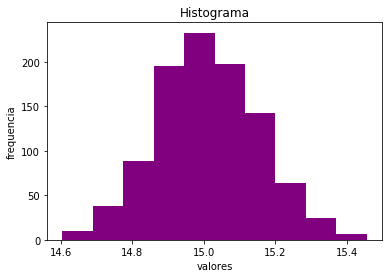

In [215]:
media1,media2,desviacion=7,8,0.1
muestra1=np.random.normal(media1, desviacion, 1000)
muestra2=np.random.normal(media2, desviacion, 1000) 
muestraArtificial=muestra1+muestra2


plt.hist(muestraArtificial,color='purple')
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()


## Ejercicio 2: Contextualización del problema

Para el problema de regresion usaremos la misma base de datos del laboratorio anterior `AirQuality.data`. Esta es la base de datos del UCI Machine Learning Repository. En el siguiente URL se encuentra toda la descripción de la base de datos del problema http://archive.ics.uci.edu/ml/datasets/air+quality. Ejecute la siguiente celda para cargar los datos.

In [0]:
#Cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('AirQuality.data',delimiter='\t')  # Assuming tab-delimiter


#X: Toma las primeras 5000 filas(muestras) y las columnas 0-11 (carácteristicas)
X = db[:5000,0:12]

#Y: Toma las primeras 5000 filas y la columna 12, corresponde a la salida de la regresión
Y = db[:5000,12]

Describa cómo esta construida la base de datos utilizada en el problema de regresión: 

2.1 ¿Cuántas muestras hay en total?:

La base de datos que tomamos tiene 5000 muestras.

In [217]:
X.shape[0]

5000

2.2 ¿Cuántas características tiene el problema?:

El problema  tiene 12 caracteristicas.

In [218]:
X.shape[1]

12

## Ejercicio 3: Completar código de K-Vecinos

Analice los siguientes métodos de la teoría vista para los modelos de *K-vecinos más cercanos (KNN)* y complete el código del método KNN.

<b>Nota</b>: Para el cáculo de la distancia entre vectores tienen dos opciones, usar la función la distancia euclidiana `scipy.spatial.distance.euclidean`([Ejemplo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html)) o usar la función `numpy.linalg.norm`([Ejemplo](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html)). Revisen la documentación para comprender su uso. También serán de utilidad las funciones `numpy.sort` y `numpy.argsort`.


In [0]:
import scipy as sc
import operator
from scipy.spatial import distance



def KNN(X_train, Y_train, X_test, k, tipo):
    
    #X_train: Matriz con las muestras de entrenamiento
    #Y_train: Vector con los valores de salida pra cada una de las muestras de entrenamiento
    
    #X_val: Matriz con las muestras de validación
    #tipo: Bandera que indica si el problema es de regresión o de clasificación.
    tipo = tipo
    
    #Parámetro k que equivale al número de vecinos a tener en cuenta para resolver el problema de 
    #predicción de la variable de salida
    k = k 
    Nt = len(X_test)
    Y_test = np.zeros(Nt)

    #Calculamos las distancia euclidiana entre matrices con las muestras de prueba y entrenamiento con la libreria de scipy
    matrix_Distace= sc.spatial.distance_matrix(X_test, X_train)
    

    for i in range (Nt):
      neighboors= np.argsort(matrix_Distace[i])[:k]
      knn = np.take(Y_train, neighboors)


      if tipo == 0:
            Y_test[i] = np.sum(knn)/k
            
      else:
            Y_test[i] = stats.mode(knn)[0]
    
    
    
    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_test, en el mismo orden.  
    return Y_test 

## Ejercicio 4: Entrenamiento y pruebas

Una vez haya completado el codigo del método de KNN:
1. Ejecute varias veces el proceso de entrenamiento y validación cambiando el parametro  $k$ que corresponde al número de vecinos
2. Completar la tabla de resultados con el error MAPE y la desviación estándar.

In [0]:
"""
Mean Absolute Percentage Error para los problemas de regresión
"""
def MAPE(Y_est,Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 


"""
Calcular el error en clasificación
"""
def error(Y_lest, Y):
    
    error = 0
    for ye, y in zip(Y_lest, Y):
        if ye != y:
            error += 1
    
    error = error/np.size(Y)
    
    return error

In [221]:
from numpy import random
import math
from scipy import stats
import numpy.matlib

N = np.size(X,0)

#Entrenamiento y validación del modelo
random.seed(1)
Error = np.zeros(2)

for j in range(2):
    
    ind=np.random.permutation(N)
    Xtrain = X[ind[0:int(math.ceil(0.7*N))],:]
    Xtest = X[ind[int(math.ceil(0.7*N)):N],:]
    Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
    Ytest = Y[ind[int(math.ceil(0.7*N)):N]]

    #Normalizamos los datos
    media = np.mean(Xtrain)
    desvia = np.std(Xtrain)
    Xtrain = sc.stats.stats.zscore(Xtrain)
    Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

    #Complete con el llamado apropiado de la función que Uds diseñaron 
    #(X_train, Y_train, X_val, k, tipo)
    Yest = KNN(Xtrain, Ytrain, Xtest, 2, 0)
    
    #Evaluamos las predicciones del modelo con los datos de test
    Error[j] = MAPE(Yest,Ytest)

mape = np.mean(Error)
std = np.std(Error)

print('\nError durante la prueba k=2 ' +  str(mape) + '+-' + str(std))


Error durante la prueba k=2 0.3630095013508765+-0.006140024361192514


In [0]:
from numpy import random
import math
from scipy import stats
import numpy.matlib

#una funcion de prueba no tener que repetir el codigo constantemente
def prueba(k,tipo,modelo):
    N = np.size(X,0)

    #Entrenamiento y validación del modelo
    random.seed(1)
    Error = np.zeros(2)

    for j in range(2):
        
        ind=np.random.permutation(N)
        Xtrain = X[ind[0:int(math.ceil(0.7*N))],:]
        Xtest = X[ind[int(math.ceil(0.7*N)):N],:]
        Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
        Ytest = Y[ind[int(math.ceil(0.7*N)):N]]

        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

        #Complete con el llamado apropiado de la función que Uds diseñaron 
        #(X_train, Y_train, X_val, k, tipo)
        if modelo == 0:
          Yest = KNN(Xtrain, Ytrain, Xtest, k,tipo)
       
        elif modelo == 1:
          Yest=Nadaraya_Watson(Xtrain, Ytrain, Xtest, k)
      
        
        #Evaluamos las predicciones del modelo con los datos de test
        Error[j] = MAPE(Yest,Ytest)

    mape = np.mean(Error)
    std = np.std(Error)
    return mape,std
    print('\nError durante la prueba k=2 ' +  str(mape) + '+-' + str(std))

Responda:

4.1 ¿Qué metodología de validación se usa en el experimento?

Se usa la metodologia bootstraping con un seed de aleatorizacion para escoger dos muestras aleatorias, una para le conjunto de entrenamiento  con el 70% y otra para el conjunto de prueba del 30%.



4.2 ¿Cuántas muestras se usan para el entrenamiento?

Se usan 3500 muestras para el entrenamiento.

In [223]:
Ytrain.shape[0]

3500

4.3 ¿Cuántas muestras se usan para la validación?

Se usan 1500 muestras para la validación.

In [224]:
Ytest.shape[0]

1500

#### Tabla de resultados

In [225]:
!pip install qgrid

In [226]:
import pandas as pd
#!pip install qgrid
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de vecinos' : pd.Series(['1', '2', '3', '4', '5', '6', '7', '100'])})
df_types["Error_Prueba"] = pd.Series()
df_types["Desviación estándar del error"] = ""
df_types.set_index(['Numero de vecinos'], inplace=True)
#df_types["Error_Prueba"][1] = "0.3630"
#df_types["Desviación estándar del error"][1] = "0.0061"
r=0
for vecinos in df_types.index:
  mape,std = prueba(int(vecinos),0,0)

  df_types["Error_Prueba"][r] = str(mape)
  df_types["Desviación estándar del error"][r] = str(std)
  r=r+1  


#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.p

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [227]:
qgrid_widget.get_changed_df()

,Error_Prueba,Desviación estándar del error
Numero de vecinos,,
1,0.384037,0.016497301273993348
2,0.363010,0.006140024361192514
3,0.349742,0.0023601226154101596
4,0.341171,0.004561202028195682
5,0.333651,0.0027102869335308977
6,0.325286,0.001992847379454543
7,0.320110,0.0007978802015047026
100,0.268797,0.005340544195603092


## Ejercicio 5: Ventana de Parzen

Resolver el mismo problema de regresión, pero con el modelo de *Ventana de Parzen*. Se debe completar el código de la función <font color='blue'>Nadaraya-Watson</font>  Recuerde la función de densidad de probabilidad con la ventana de Parzen.
$$f({\bf{x}}^*) = \frac{1}{N h^d} \sum_{i=1}^{N} K(u_i), \;\; u_i = \frac{d({\bf{x}}^*,{\bf{x}}_i)}{h}$$


Nota: Los métodos `dist_euclidiana` y ECM continuan siendo válidos para el modelo ventana de Parzen.


In [0]:
def kernel_gaussiano(x):
    return (np.exp((-0.5)*x**2))

def Nadaraya_Watson(X_train, Y_train, X_val, ancho_h):
    
    h = ancho_h    #Parámetro h que equivale al ancho de la ventana o kernel
    Nv = len(X_val)
    Y_val = np.zeros(Nv)
    matrix_Distance= sc.spatial.distance_matrix(X_val, X_train)/h
    for i in range(Nv):
        k = kernel_gaussiano(matrix_Distance[i])
        p = np.sum(np.multiply(k, Y_train))
        q = np.sum(k)
        Y_val[i] = p/q
        


    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_val, en el mismo orden.      
    return Y_val


## Ejercicio 6: Entrenamiento y pruebas

Una vez haya completado el codigo del método de Ventana de Parzen, ejecute varias veces el proceso de entrenamiento y validación cambiando el parametro $h$, que corresponde al ancho de la función kernel. Completar la siguiente tabla con los valores del error MAPE obtenidos y su desviación estándar:

#### Tabla de resultados

In [229]:
randn = np.random.randn
df_types2 = pd.DataFrame({
    'Ancho del kernel' : pd.Series(['0.1', '0.9', '1', '2', '3', '5', '10'])})
df_types2["Error_Prueba"] = ""
df_types2["Desviación estándar del error"] = ""
df_types2.set_index(['Ancho del kernel'], inplace=True)
#df_types2["Error_Prueba"][1] = "0.3011"
#df_types2["Desviación estándar del error"][1] = "0.0031"

contador=0
for ancho in df_types2.index:
  mape,std = prueba(float(ancho),0,1)
  #print(contador)
  #print(str(mape))
  #print(str(std))


  df_types2["Error_Prueba"][contador] = str(mape)
  df_types2["Desviación estándar del error"][contador] = str(std)
  contador=contador+1 

df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types2, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [230]:
qgrid_widget.get_changed_df()

,Error_Prueba,Desviación estándar del error
Ancho del kernel,,
0.1,0.3813005747268332,0.015731141225733464
0.9,0.30111035388439256,0.0031344056092405814
1,0.30522294039569686,0.003159218224823318
2,0.305480581722527,0.003943068384557213
3,0.299316519656669,0.004245154346174562
5,0.26443740714511743,0.003381117045310217
10,2.1427564244929034,0.15597858444551282


Responda:

6.1 Si intenta repetir la prueba anterior para un $h = 0.05$ el algoritmo falla. ¿Cuál es la causa de la falla?:

Al producir un valor de una "ventana" tan pequeña las distancias se hacen muy grandes seguido de esto al aplicar la funcion de kernel gaussiano a un valor muy grande da valores muy pequeños que da resultados indeterminados.

In [231]:
prueba(0.05,0,1)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-pack

(nan, nan)

6.2 ¿Cómo evito que se presente la excepción?:

Se pueden tener multiples controles de valores y agregar excepciones, tambien hay que tener en cuenta que entre menor sea el h menor sera el peso de los valores que se tiene por tanto no es adecuado un h muy pequeño.